In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


data = pd.read_csv('sales_data.csv')
data.head()



,ProductID,ProductName,Category,City,Price,QuantitySold,Month,Year
0,577,Pen,Stationery,Mashhad,154000,199.0,7.0,2022.0
1,616,Desk Lamp,Office Supplies,Mashhad,799000,174.0,4.0,2022.0
2,535,Bookshelf,Furniture,Ahvaz,1469000,396.0,1.0,2024.0
3,416,Mouse,Electronics,Ahvaz,44854000,44.0,2.0,2023.0
4,886,Bookshelf,Furniture,Rasht,4399000,118.0,2.0,2020.0


In [10]:
data.describe()

,ProductID,Price,QuantitySold,Month,Year
count,50000.000000,5.000000e+04,49948.000000,49651.000000,49760.000000
mean,549.381340,1.590999e+07,142.207356,6.499144,2022.006330
std,259.877269,1.610514e+07,153.127378,3.450594,1.415868
min,100.000000,1.000000e+04,1.000000,1.000000,2020.000000
25%,324.000000,1.528000e+06,25.000000,3.000000,2021.000000
50%,550.000000,9.189500e+06,48.000000,6.000000,2022.000000
75%,774.000000,2.960100e+07,256.000000,9.000000,2023.000000
max,998.000000,4.999800e+07,500.000000,12.000000,2024.000000


In [11]:
data['ProductName'].value_counts()


ProductName
Table         3435
Smartphone    3406
Keyboard      3378
Monitor       3374
Tablet        3372
Mouse         3342
Camera        3325
Headphone     3303
Pen           3288
Chair         3286
Notebook      3269
Bookshelf     3267
Printer       3257
Desk Lamp     3234
Laptop        3234
Name: count, dtype: int64

In [12]:
data['Category'].value_counts()


Category
Electronics        30083
Furniture          10029
Stationery          6577
Office Supplies     3245
Name: count, dtype: int64

In [13]:
data['City'].value_counts()

City
Isfahan       5083
Rasht         5078
Qom           5066
Tehran        4996
Karaj         4968
Kermanshah    4961
Shiraz        4959
Tabriz        4944
Ahvaz         4906
Mashhad       4871
Name: count, dtype: int64

In [14]:
data.isna().any()

ProductID       False
ProductName      True
Category         True
City             True
Price           False
QuantitySold     True
Month            True
Year             True
dtype: bool

In [15]:
data.isna().sum()

ProductID         0
ProductName     230
Category         66
City            168
Price             0
QuantitySold     52
Month           349
Year            240
dtype: int64

In [16]:
data.isna().sum().sum()


1105

In [17]:
data['ProductName']=data['ProductName'].fillna('Unknown')

In [18]:
data.isna().sum()

ProductID         0
ProductName       0
Category         66
City            168
Price             0
QuantitySold     52
Month           349
Year            240
dtype: int64

In [19]:
data['ProductName'].value_counts()



ProductName
Table         3435
Smartphone    3406
Keyboard      3378
Monitor       3374
Tablet        3372
Mouse         3342
Camera        3325
Headphone     3303
Pen           3288
Chair         3286
Notebook      3269
Bookshelf     3267
Printer       3257
Desk Lamp     3234
Laptop        3234
Unknown        230
Name: count, dtype: int64

In [20]:
data =data.dropna()

In [21]:
data.isna().sum()

ProductID       0
ProductName     0
Category        0
City            0
Price           0
QuantitySold    0
Month           0
Year            0
dtype: int64

In [26]:
data.shape

(49172, 8)

In [27]:
data.loc[data['ProductID']==1,'ProductName']='Printer'

In [29]:
data


,ProductID,ProductName,Category,City,Price,QuantitySold,Month,Year
0,577,Pen,Stationery,Mashhad,154000,199.0,7.0,2022.0
1,616,Desk Lamp,Office Supplies,Mashhad,799000,174.0,4.0,2022.0
2,535,Bookshelf,Furniture,Ahvaz,1469000,396.0,1.0,2024.0
3,416,Mouse,Electronics,Ahvaz,44854000,44.0,2.0,2023.0
4,886,Bookshelf,Furniture,Rasht,4399000,118.0,2.0,2020.0
...,...,...,...,...,...,...,...,...
49995,311,Chair,Furniture,Tehran,1848000,443.0,10.0,2021.0
49996,480,Pen,Stationery,Isfahan,93000,158.0,6.0,2024.0
49997,941,Headphone,Electronics,Ahvaz,33549000,45.0,5.0,2020.0
49998,594,Laptop,Electronics,Kermanshah,22101000,24.0,3.0,2020.0


In [7]:
Month_Sales = data.groupby('Month')['Price'].sum()

In [10]:
Month_Sales

Month
1.0     64120157000
2.0     65789349000
3.0     65919921000
4.0     64335919000
5.0     66983921000
6.0     67096035000
7.0     63454966000
8.0     65870311000
9.0     66555807000
10.0    68252647000
11.0    65351270000
12.0    66190433000
Name: Price, dtype: int64

<BarContainer object of 12 artists>

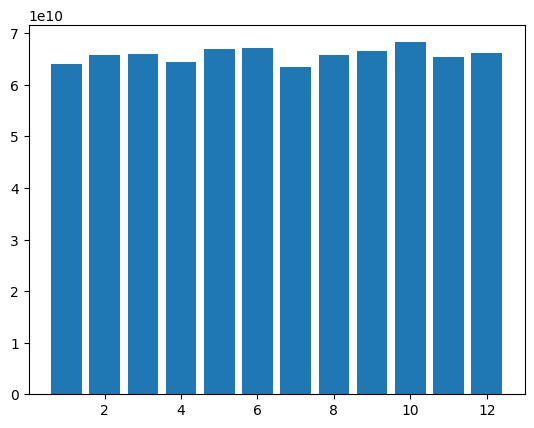

In [11]:
plt.bar(Month_Sales.index,Month_Sales.values)

In [21]:
 BestSalesProduct= data.groupby('ProductName')['QuantitySold'].sum().sort_values(ascending=False)[:10]

In [22]:
BestSalesProduct

ProductName
Table         880110.0
Chair         835062.0
Bookshelf     833496.0
Notebook      832034.0
Pen           828730.0
Desk Lamp     820415.0
Keyboard      235242.0
Smartphone    235043.0
Tablet        233127.0
Mouse         229739.0
Name: QuantitySold, dtype: float64

<BarContainer object of 10 artists>

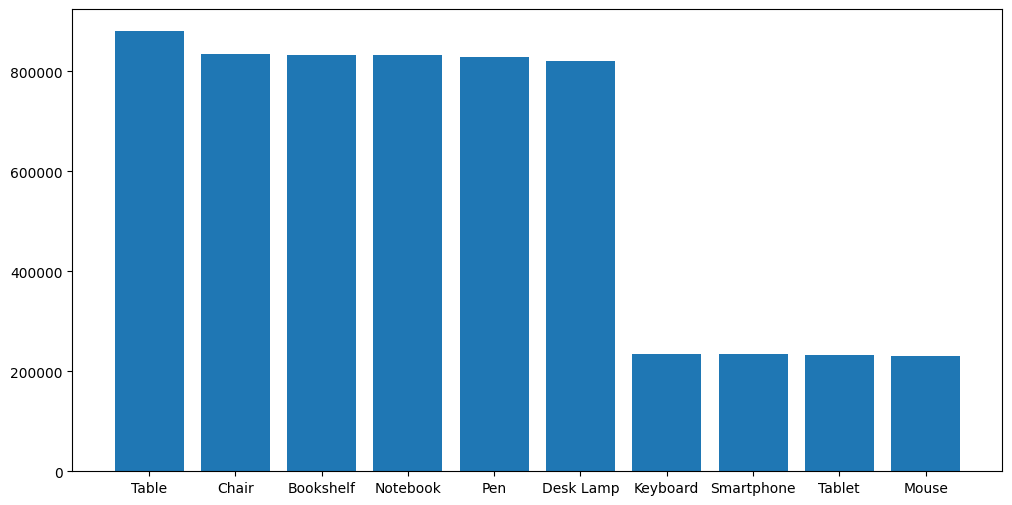

In [25]:
plt.figure(figsize=(12,6))
plt.bar(BestSalesProduct.index,BestSalesProduct.values)

(array([11741.,  3647.,  3541.,  3512.,   779.,   748.,   777.,   751.,
          752.,   788.,   772.,   759.,   767.,   802.,   791.,   749.,
          771.,   748.,   736.,   764.,   744.,   781.,   741.,   769.,
          765.,   757.,   744.,   777.,   817.,   764.,   784.,   743.,
          732.,   755.,   796.,   760.,   765.,   762.,   781.,   768.]),
 array([1.00000e+04, 1.25970e+06, 2.50940e+06, 3.75910e+06, 5.00880e+06,
        6.25850e+06, 7.50820e+06, 8.75790e+06, 1.00076e+07, 1.12573e+07,
        1.25070e+07, 1.37567e+07, 1.50064e+07, 1.62561e+07, 1.75058e+07,
        1.87555e+07, 2.00052e+07, 2.12549e+07, 2.25046e+07, 2.37543e+07,
        2.50040e+07, 2.62537e+07, 2.75034e+07, 2.87531e+07, 3.00028e+07,
        3.12525e+07, 3.25022e+07, 3.37519e+07, 3.50016e+07, 3.62513e+07,
        3.75010e+07, 3.87507e+07, 4.00004e+07, 4.12501e+07, 4.24998e+07,
        4.37495e+07, 4.49992e+07, 4.62489e+07, 4.74986e+07, 4.87483e+07,
        4.99980e+07]),
 <BarContainer object of 40 art

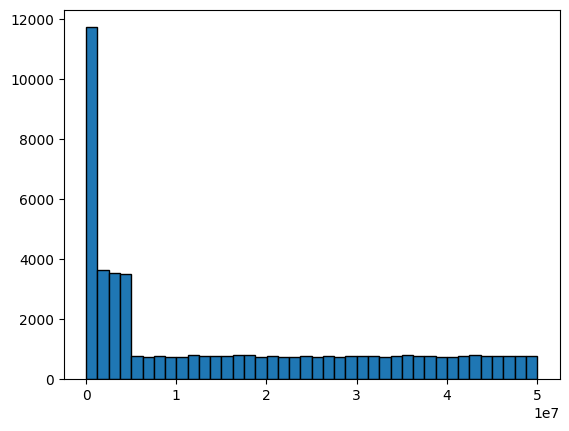

In [28]:
plt.hist(data['Price'],bins=40,edgecolor='k')